In [11]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn as sk
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import sklearn.datasets as ds
from sklearn.preprocessing import LabelEncoder

In [13]:
# Importing the dataset
coffee_shop_data = pd.read_csv('coffee_shop_revenue.csv')
coffee_shop_data.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,152,6.74,14,4,106.62,97,1547.81
1,485,4.50,12,8,57.83,744,2084.68
2,398,9.09,6,6,91.76,636,3118.39
3,320,8.48,17,4,462.63,770,2912.20
4,156,7.44,17,2,412.52,232,1663.42


In [15]:
# Shape of the dataset
coffee_shop_data.shape

(2000, 7)

In [17]:
# Information about dataset
coffee_shop_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Number_of_Customers_Per_Day  2000 non-null   int64  
 1   Average_Order_Value          2000 non-null   float64
 2   Operating_Hours_Per_Day      2000 non-null   int64  
 3   Number_of_Employees          2000 non-null   int64  
 4   Marketing_Spend_Per_Day      2000 non-null   float64
 5   Location_Foot_Traffic        2000 non-null   int64  
 6   Daily_Revenue                2000 non-null   float64
dtypes: float64(3), int64(4)
memory usage: 109.5 KB


In [19]:
# Lets know statistical details about the dataset
coffee_shop_data.describe()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,274.296000,6.261215,11.667000,7.947000,252.614160,534.893500,1917.325940
std,129.441933,2.175832,3.438608,3.742218,141.136004,271.662295,976.202746
min,50.000000,2.500000,6.000000,2.000000,10.120000,50.000000,-58.950000
25%,164.000000,4.410000,9.000000,5.000000,130.125000,302.000000,1140.085000
50%,275.000000,6.300000,12.000000,8.000000,250.995000,540.000000,1770.775000
75%,386.000000,8.120000,15.000000,11.000000,375.352500,767.000000,2530.455000
max,499.000000,10.000000,17.000000,14.000000,499.740000,999.000000,5114.600000


**Lets Analyse And Visualise The Data** 

<Axes: >

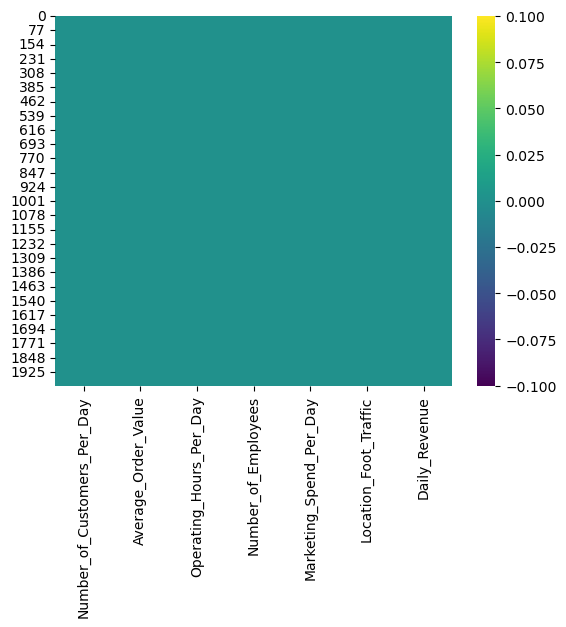

In [22]:
# Heatmap let us know if there any missing value is
sns.heatmap(coffee_shop_data.isnull(),cmap='viridis')

In [23]:
# Checking missing values 
coffee_shop_data.isnull().sum()

Number_of_Customers_Per_Day    0
Average_Order_Value            0
Operating_Hours_Per_Day        0
Number_of_Employees            0
Marketing_Spend_Per_Day        0
Location_Foot_Traffic          0
Daily_Revenue                  0
dtype: int64

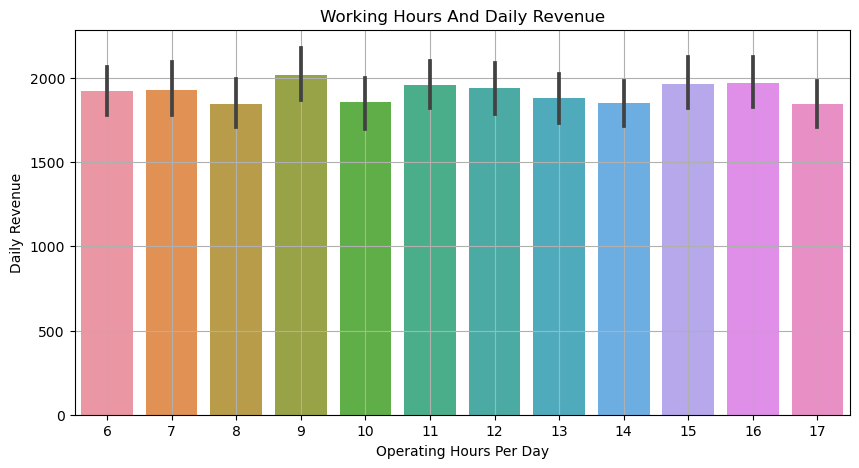

In [24]:
plt.figure(figsize=(10,5))
sns.barplot(x='Operating_Hours_Per_Day',y='Daily_Revenue',data=coffee_shop_data)
plt.xlabel('Operating Hours Per Day')
plt.ylabel('Daily Revenue')
plt.title('Working Hours And Daily Revenue')
plt.grid(True)

C:\Users\Monish. S\AppData\Local\Temp\ipykernel_6792\1917118788.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(coffee_shop_data['Operating_Hours_Per_Day'])
D:\IDE\Anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


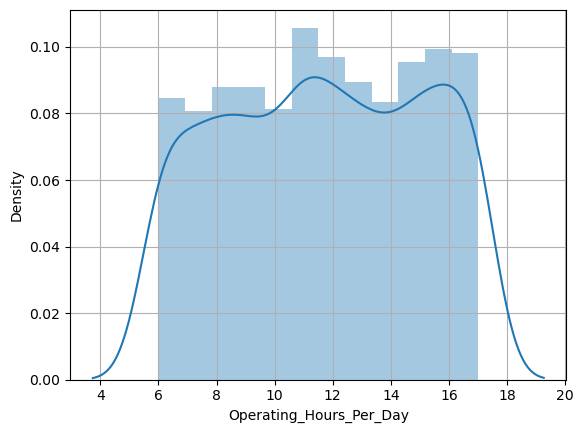

In [25]:
sns.distplot(coffee_shop_data['Operating_Hours_Per_Day'])
plt.grid(True)

<Figure size 3000x900 with 0 Axes>

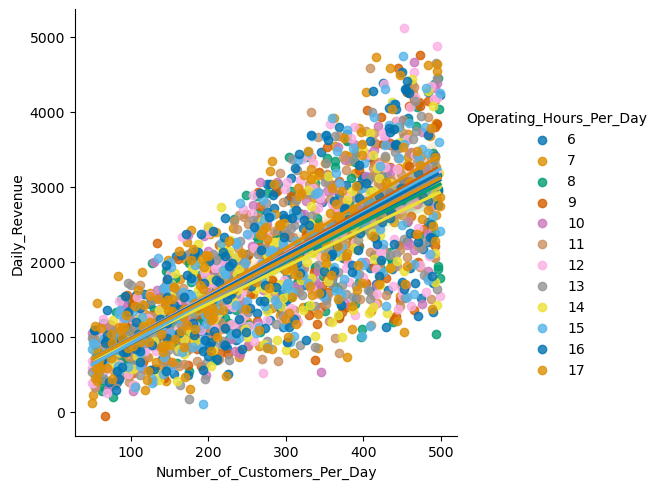

In [26]:
plt.figure(figsize=(30,9))
sns.lmplot(x='Number_of_Customers_Per_Day',y='Daily_Revenue',data=coffee_shop_data,palette='colorblind',hue='Operating_Hours_Per_Day')
plt.show()

<Axes: >

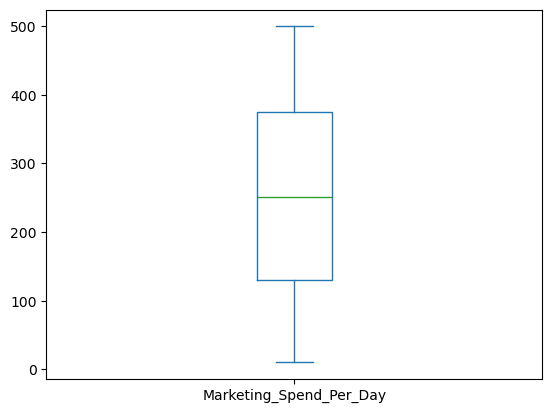

In [27]:
coffee_shop_data['Marketing_Spend_Per_Day'].plot(kind='box')

**Lets Visualise Box plot To detect outliers**

<Axes: >

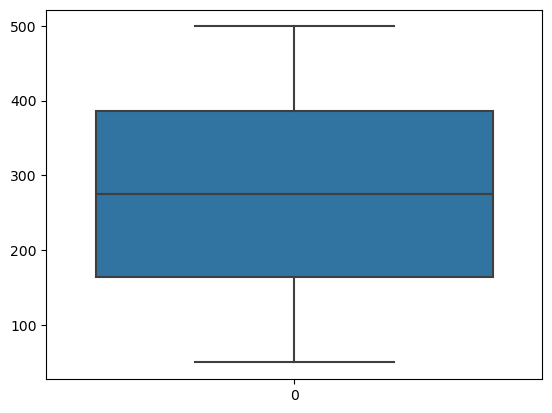

In [29]:
sns.boxplot(coffee_shop_data['Number_of_Customers_Per_Day'])

<Axes: >

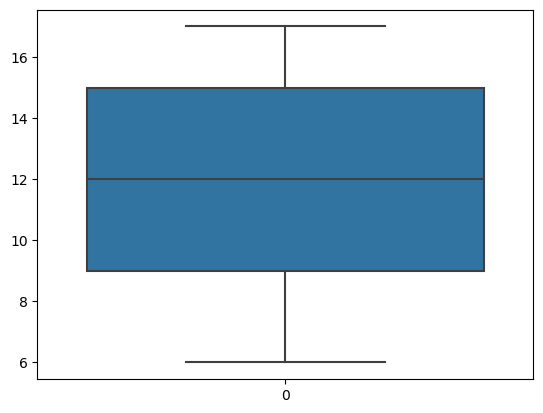

In [30]:
sns.boxplot(coffee_shop_data['Operating_Hours_Per_Day'])

<Axes: >

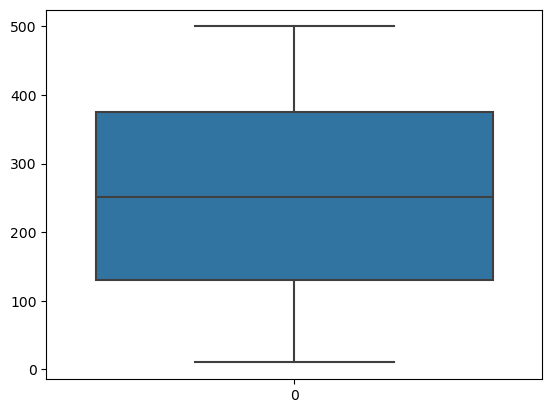

In [31]:
sns.boxplot(coffee_shop_data['Marketing_Spend_Per_Day'])

<Axes: >

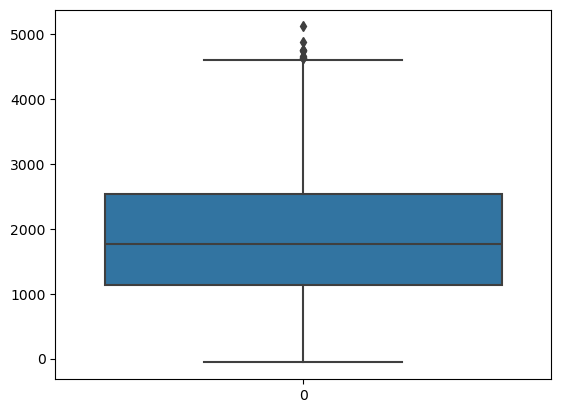

In [32]:
sns.boxplot(coffee_shop_data['Daily_Revenue'])

**Feature Selection**

In [34]:
coffee_shop_data.columns

Index(['Number_of_Customers_Per_Day', 'Average_Order_Value',
       'Operating_Hours_Per_Day', 'Number_of_Employees',
       'Marketing_Spend_Per_Day', 'Location_Foot_Traffic', 'Daily_Revenue'],
      dtype='object')

In [35]:
X = coffee_shop_data.drop('Daily_Revenue',axis=1)
X.head()

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic
0,152,6.74,14,4,106.62,97
1,485,4.50,12,8,57.83,744
2,398,9.09,6,6,91.76,636
3,320,8.48,17,4,462.63,770
4,156,7.44,17,2,412.52,232


In [36]:
corr = X.corr()
corr

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic
Number_of_Customers_Per_Day,1.000000,-0.014647,0.000122,0.000346,0.027184,-0.000880
Average_Order_Value,-0.014647,1.000000,-0.017125,0.011484,0.018782,0.018151
Operating_Hours_Per_Day,0.000122,-0.017125,1.000000,-0.030451,0.019247,0.014422
Number_of_Employees,0.000346,0.011484,-0.030451,1.000000,0.026535,-0.041881
Marketing_Spend_Per_Day,0.027184,0.018782,0.019247,0.026535,1.000000,-0.012562
Location_Foot_Traffic,-0.000880,0.018151,0.014422,-0.041881,-0.012562,1.000000


<Axes: >

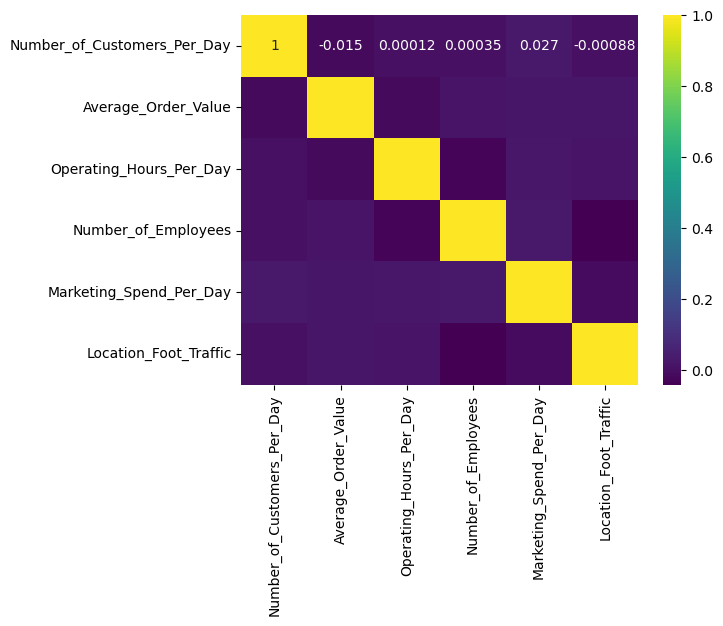

In [37]:
sns.heatmap(corr,annot=True,cmap=plt.cm.viridis)

In [38]:
# With the following function we can select the highly correlated features
def  correlation (dataset, threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range (i):
            if (corr_matrix.iloc[i,j]) > threshold:
                colname = corr_matrix.columns[i]
                col_corr.add(colname)
    return col_corr

In [39]:
corr_columns = correlation(X,0.7)
len(corr_columns)

0

In [40]:
# Lets try variance threshold

from sklearn.feature_selection import VarianceThreshold

In [41]:
var_thres = VarianceThreshold(threshold=0)
var_thres.fit(X)

VarianceThreshold(threshold=0)

In [44]:
var_thres.get_support()

array([ True,  True,  True,  True,  True,  True])

In [45]:
X.columns[var_thres.get_support()]

Index(['Number_of_Customers_Per_Day', 'Average_Order_Value',
       'Operating_Hours_Per_Day', 'Number_of_Employees',
       'Marketing_Spend_Per_Day', 'Location_Foot_Traffic'],
      dtype='object')

In [46]:
constant_columns = [column for column in X.columns
                   if column not in X.columns[var_thres.get_support()]]
print(len(constant_columns))
print(constant_columns)

0
[]


<p style='font-size:30px'>OBSERVATION : Every features are important, thus, we kept all features.</p>

**Scaling Down** 

In [51]:
## Scale down the features as we are using the regression model

In [52]:
from sklearn.preprocessing import StandardScaler

In [53]:
scaler = StandardScaler()

In [54]:
scaled_data = scaler.fit_transform(coffee_shop_data)

In [55]:
scaled_data

array([[-0.94503058,  0.22010187,  0.67864196, ..., -1.03468051,
        -1.61230698, -0.37861843],
       [ 1.62819491, -0.80964673,  0.09686574, ..., -1.38046188,
         0.76992207,  0.17147659],
       [ 0.95591077,  1.30041848, -1.64846291, ..., -1.13999535,
         0.37227023,  1.23065054],
       ...,
       [-1.43185703, -0.45107356,  1.26041817, ...,  0.87898803,
        -0.8280492 , -0.98978161],
       [ 0.99454779,  1.44752542, -1.3575748 , ...,  1.41654731,
         0.15503451,  2.40674543],
       [-1.43185703,  0.28446115,  0.38775385, ..., -1.23425426,
        -0.78386566, -1.02779552]])

In [56]:
scaled_coffee_data = pd.DataFrame(scaled_data, columns=coffee_shop_data.columns)
scaled_coffee_data

,Number_of_Customers_Per_Day,Average_Order_Value,Operating_Hours_Per_Day,Number_of_Employees,Marketing_Spend_Per_Day,Location_Foot_Traffic,Daily_Revenue
0,-0.945031,0.220102,0.678642,-1.054986,-1.034681,-1.612307,-0.378618
1,1.628195,-0.809647,0.096866,0.014166,-1.380462,0.769922,0.171477
2,0.955911,1.300418,-1.648463,-0.520410,-1.139995,0.372270,1.230651
3,0.353173,1.019996,1.551306,-1.054986,1.488411,0.865653,1.019381
4,-0.914121,0.541898,1.551306,-1.589562,1.133274,-1.115242,-0.260161
...,...,...,...,...,...,...,...
1995,0.754998,0.068398,-0.194022,-1.054986,1.513074,1.392174,0.921683
1996,-1.308219,-1.494613,-0.194022,-0.253122,-1.700871,-1.104196,-1.618261
1997,-1.431857,-0.451074,1.260418,0.281454,0.878988,-0.828049,-0.989782
1998,0.994548,1.447525,-1.357575,1.083318,1.416547,0.155035,2.406745


**Train Test Split**

In [58]:
X = scaled_coffee_data.drop('Daily_Revenue',axis=1)
y = scaled_coffee_data['Daily_Revenue']

In [59]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=3)

In [60]:
from sklearn.linear_model import LinearRegression

In [61]:
model = LinearRegression()

In [62]:
model.fit(X_train,y_train)

LinearRegression()

In [63]:
# Predict on train and test
X_Train_Pred = model.predict(X_train)
X_Test_Pred = model.predict(X_test)

In [64]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [65]:
## Evaluating the model with different performance evaluation metrics

In [66]:
X_train_mse = mean_squared_error(y_train,X_Train_Pred)
X_train_rmse = X_train_mse**0.5
X_train_mae = mean_absolute_error(y_train,X_Train_Pred)
X_train_r2 = r2_score(y_train,X_Train_Pred)

In [67]:
X_test_mse = mean_squared_error(y_test,X_Test_Pred)
X_test_rmse = X_test_mse**0.5
X_test_mae = mean_absolute_error(y_test,X_Test_Pred)
X_test_r2 = r2_score(y_test,X_Test_Pred)

In [69]:
print("Mean Squared Error:")

print(f"Training Accuracy = {X_train_mse},\n",f"Test Accuracy = {X_test_mse}")

Mean Squared Error:
Training Accuracy = 0.10915707772122461,
 Test Accuracy = 0.10741635648177882


In [73]:
print("Root Mean Squared Error:")
print(f"Training Accuracy = {X_train_rmse},\n",f"Test Accuracy = {X_test_rmse}")

Root Mean Squared Error:
Training Accuracy = 0.33038928209193563,
 Test Accuracy = 0.32774434622397197


In [75]:
print("Mean Absolute Error:")
print(f"Training Accuracy = {X_train_mae},\n",f"Test Accuracy = {X_test_mae}")

Mean Absolute Error:
Training Accuracy = 0.2590710208861127,
 Test Accuracy = 0.260485211086102


In [80]:
print("R Squared:")
print(f"Training Accuracy = {X_train_r2},\n",f"Test Accuracy = {X_test_r2}")

R Squared:
Training Accuracy = 0.8893856065325083,
 Test Accuracy = 0.8956975125390758


<div class="alert alert-block alert-warning">
<b>Therefore our Coffee Shop Model was generalized well and performing well with excellent accuracy among training and testing data</b>
</div>

In [132]:
import pickle

In [136]:
# Save the model to disk
pickle_out = open("coffee_shop.pkl","wb")
pickle.dump(model,pickle_out)
loaded_model = pickle.load(open("coffee_shop.pkl","rb"))
result = loaded_model.score(X_test,y_test)
print(result)

0.8956975125390758
